<center>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/1866301/3047725/a8442c4170479f83d6dcab16b655bf87/dataset-cover.jpg?t=2022-01-15-19-25-24" width="400" alt="wine quality.ai logo"  />
</center>

## About Dataset
### Description:

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
**Your task is to predict the quality of wine using the given data.** 

A simple yet challenging project, to anticipate the quality of wine.

The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.

**Acknowledges:**

This dataset is also available from Kaggle & UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.


## Objectives

This Notebook will provide knowledge about basic Machine Learning concepts like:

* Feature Engineering and Feature Selection (Cleanup)
* Data Exploratory Ananlysis (understand the Dataset)
* Principle Component Analysis
* Prediction and Model selection (fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.)


# Table of Contents

<div class= "alert alert-block alert-info" style="margin-top: 20px">


* [1-Python libraries](#chapter2)
    * [1.1-Import libraries](#section_2_1)
* [2-Data](#chapter3)
    * [2.1-Collecting data](#section_3_1)
    * [2.2-Data information](#section_3_2)
    * [2.3-Attribute information](#section_3_3)
* [3-Data preprocessing](#chapter4)

    * [3.1-Missing values handling](#section_4_1)
    * [3.2-Plot analysis](#section_4_2)
    * [3.3-Feature Engineering](#section_4.3)
        * [3.3.1-Visualization and plots](#section_4_3_1)
        * [3.3.2-Engineering Numeric Attributes](#section_4_3_2)
    * [3.4-Target categorizing](#section_4_4)
    * [3.5-Normalization](#section_4_5)
* [4-Modeling](#chapter5)
    * [4.1-RandomForestClassifier](#section_5_1)
    * [4.2-Logistic regression](#section_5_2)
	* [4.3-Support Vector Machine](#section_5_3)
	* [4.4-Decision Tree classifier](#section_5_4)
	* [4.5-KNeighbors classifier](#section_5_5)
	* [4.6-Gaussian Naive Bayes](#section_5_6)
	* [4.7-Summary](#section_5_7)

</div>       

## 1-Python libraries <a id="chapter2"></a>

### 1.1-Import libraries <a id="section_2_1"></a>

In [1]:
import pandas as pd #library that aids in the manipulation and analysis of data
import numpy as np # library used for working with arrays
import matplotlib  #comprehensive library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt #2D plotting library used in Python

import plotly.offline as pyo # Set notebook mode to work in offline
from plotly import express as px #contains functions that can create entire figures at once
import plotly.graph_objects as go #contains an automatically-generated hierarchy of Python classes which represent non-leaf nodes in this figure schema.
pyo.init_notebook_mode()

from plotly.subplots import make_subplots #to make subplots
import seaborn as sns #library  data visualization

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold 
#train_test_split split arrays or matrices into random train and test subsets.
#GridSearchCV implements a “fit” and a “score” method.
#cross_val_score Evaluate a score by cross-validation.
#KFold K-Fold cross-validator.

from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance. z = (x - u) / s
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range. Between 0 and 1
from sklearn.metrics import classification_report #Build a text report showing the main classification metrics.
from sklearn import metrics # includes score functions, performance metrics and pairwise metrics and distance computations.


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## 2-Data <a id="chapter3"></a>
### 2.1-Collecting data <a id="section_3_1"></a>

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()
# df.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

### 2.2-Data information <a id="section_3_3"></a>

Type of data

In [3]:
#summarized information
sumarize_info=df.info()
print(sumarize_info,  df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None (6497, 13)


general stats

In [4]:
df.describe().T.style.background_gradient(axis=0)

### 2.3-Attribute information <a id="section_3_3"></a>

**This data frame contains the following columns:**


| Feature              | Explain                                                                                                                             |
|:----------------------|:-------------------------------------------------------------------------------------------------------------------------------------|
| type        | the type of wine, white or red                                                                                                               |
| fixed acidity        | most acids involved with wine or fixed or nonvolatile                                                                               |
| volatile acidity     | the amount of acetic acid in wine                                                                                                   |
| citric acid          | the amount of citric acid in wine                                                                                                   |
| residual sugar       | the amount of sugar remaining after fermentation stops                                                                              |
| chlorides            | the amount of salt in the wine.                                                                                                     |
| free sulfur dioxide  | the amount of free sulfur dioxide in the wine(those available to react and thus exhibit both germicidal and antioxidant properties) |
| total sulfur dioxide | amount of free and bound forms of SO2                                                                                               |
| density              | the measurement of how tightly a material is packed together                                                                        |
| PH                   | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4              |
| sulphates                   | | sulphates                   | the amount of sulphates in wine 
                                   |              
| Alcohol              | the percent alcohol content of the wine                                                                                             |
| quality              | output variable (based on sensory data, score between 0 and 10)                                                                      |

*Output variable (based on sensory data):*
12 - quality (score between 0 and 10)

Unique information for each attribute

In [5]:
for col in list(df):
    print(col)
    print(np.sort(df[col].unique()))
    print('\n')

type
['red' 'white']


fixed acidity
[ 3.8   3.9   4.2   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2
  5.3   5.4   5.5   5.6   5.7   5.8   5.9   6.    6.1   6.15  6.2   6.3
  6.4   6.45  6.5   6.6   6.7   6.8   6.9   7.    7.1   7.15  7.2   7.3
  7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3   8.4   8.5
  8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9
 11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1
 12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.2  13.3  13.4
 13.5  13.7  13.8  14.   14.2  14.3  15.   15.5  15.6  15.9    nan]


volatile acidity
[0.08  0.085 0.09  0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14
 0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.2   0.205
 0.21  0.215 0.22  0.225 0.23  0.235 0.24  0.245 0.25  0.255 0.26  0.265
 0.27  0.275 0.28  0.285 0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.325
 0.33  0.

## 3-Data preprocessing <a id="chapter4"></a>

### 3.1-Missing values handling<a id="section_4_1"></a>

**Understanding data**

Before cleaning data, there are a couple of things we would like to know: for example, the dimensions of a dataset, the data type of each variable, perhaps a peek at the first few rows and last few rows of the data (to see what it looks like and confirm it matches our expectations), the name of each variable. 

Get the percentage of missing data

In [6]:
total_entries = (df.shape[0] * df.shape[1]) # nr rows * nr columns
missing_entries_max = df.isnull().sum().sum() # in rows and columns
missing_entries_max_percentage = (missing_entries_max / total_entries) * 100

print(f'Total entries in the dataset: {total_entries}' )
print(f'Maximum missing values in the dataset: {missing_entries_max}')
print(f'Percentage of maximum missing values in the dataset: {missing_entries_max_percentage:.2f}%')

Total entries in the dataset: 84461
Maximum missing values in the dataset: 38
Percentage of maximum missing values in the dataset: 0.04%


**Get information about missing values**

Check missing data by variable, nr rows and columns

In [8]:
df.isnull().sum(), df.shape[0] , df.shape[1]

(type                     0
 fixed acidity           10
 volatile acidity         8
 citric acid              3
 residual sugar           2
 chlorides                2
 free sulfur dioxide      0
 total sulfur dioxide     0
 density                  0
 pH                       9
 sulphates                4
 alcohol                  0
 quality                  0
 dtype: int64,
 6497,
 13)

The missing entries is negligable 0.04%, so we can drop entry that contains a null without affecting accruracy of prediction.

**get the subset without missing data**

create a new data frame to hold all the rows with no empty data

In [9]:
# drop missing values and assign the data to no_missing data
no_missing = df.dropna() # equal to dropna(axis=0) axis= 0 is to rows ( by default), if axis =1 is for column

total_entries_no_missing = no_missing.shape[0]*no_missing.shape[1] #nr of data without data missing

# this reset the index back to 0
no_missing = no_missing.reset_index(drop=True)

print(no_missing.shape)
print(no_missing.head())

(6463, 13)
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  


Verify is no empty data

In [10]:
no_missing.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values.

Verify unique values by attribute sorted Ascending 

In [11]:
df_no_missing = no_missing
for col in list(df_no_missing):
    print(col)
    print(np.sort(df_no_missing[col].unique()))
    print('\n')
    

type
['red' 'white']


fixed acidity
[ 3.8   3.9   4.2   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2
  5.3   5.4   5.5   5.6   5.7   5.8   5.9   6.    6.1   6.15  6.2   6.3
  6.4   6.45  6.5   6.6   6.7   6.8   6.9   7.    7.1   7.15  7.2   7.3
  7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3   8.4   8.5
  8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9
 11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1
 12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.2  13.3  13.4
 13.5  13.7  13.8  14.   14.2  14.3  15.   15.5  15.6  15.9 ]


volatile acidity
[0.08  0.085 0.09  0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14
 0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.2   0.205
 0.21  0.215 0.22  0.225 0.23  0.235 0.24  0.245 0.25  0.255 0.26  0.265
 0.27  0.275 0.28  0.285 0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.325
 0.33  0.335 0.

**Visualization and Plots for raw data**

Create a copy of dataframe original to don't lose information

In [12]:
data = df_no_missing.copy()

Create a list of DataFrame columns with all attributes  except <code>type</code> and <code>quality</code>.

In [13]:
data_target = df_no_missing[['type', 'quality']]


# data_features = df_no_missing.loc[ : ,df_no_missing.columns!= 'type' ] # to exclude only one
data_features = df_no_missing.loc[ : ,~df_no_missing.columns.isin(['type', 'quality']) ] # to exclude more columns

data_target.head(), data_features.head()

(    type  quality
 0  white        6
 1  white        6
 2  white        6
 3  white        6
 4  white        6,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0           

**Join features and target** in one dataframe by this order

In [14]:
df_join_features_target =data_features.join(data_target, lsuffix="_left", rsuffix="_right")
df_join_features_target.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol   type  quality  
0      8.8  white        6  
1      9.5  white        6  
2     10.1  white        6  
3      9.9  white        6  
4      9.9  white        6

get the values of dataframe as a list and set order of columns in pandas dataframe

In [15]:
columnsTitles = list(df_join_features_target.columns.values)
columnsTitles1 = ['type', 'quality',
                  'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' ]

frame = df_join_features_target.reindex(columns=columnsTitles1)
frame.head()

type  quality  fixed acidity  volatile acidity  citric acid  \
0  white        6            7.0              0.27         0.36   
1  white        6            6.3              0.30         0.34   
2  white        6            8.1              0.28         0.40   
3  white        6            7.2              0.23         0.32   
4  white        6            7.2              0.23         0.32   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0            20.7      0.045                 45.0                 170.0   
1             1.6      0.049                 14.0                 132.0   
2             6.9      0.050                 30.0                  97.0   
3             8.5      0.058                 47.0                 186.0   
4             8.5      0.058                 47.0                 186.0   

   density    pH  sulphates  alcohol  
0   1.0010  3.00       0.45      8.8  
1   0.9940  3.30       0.49      9.5  
2   0.9951  3.26       0.44     10.1  
3   0.9956  3.19       0.40      9.9  
4   0.9956  3.19       0.40      9.9

get name of columns, columns sorted and len in join dataframe

In [16]:
columns = list(df_join_features_target.columns)

print(columns, sorted(columns), len(columns))
print(columns[:11])


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type', 'quality'] ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'quality', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'type', 'volatile acidity'] 13
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


**By type and quality**

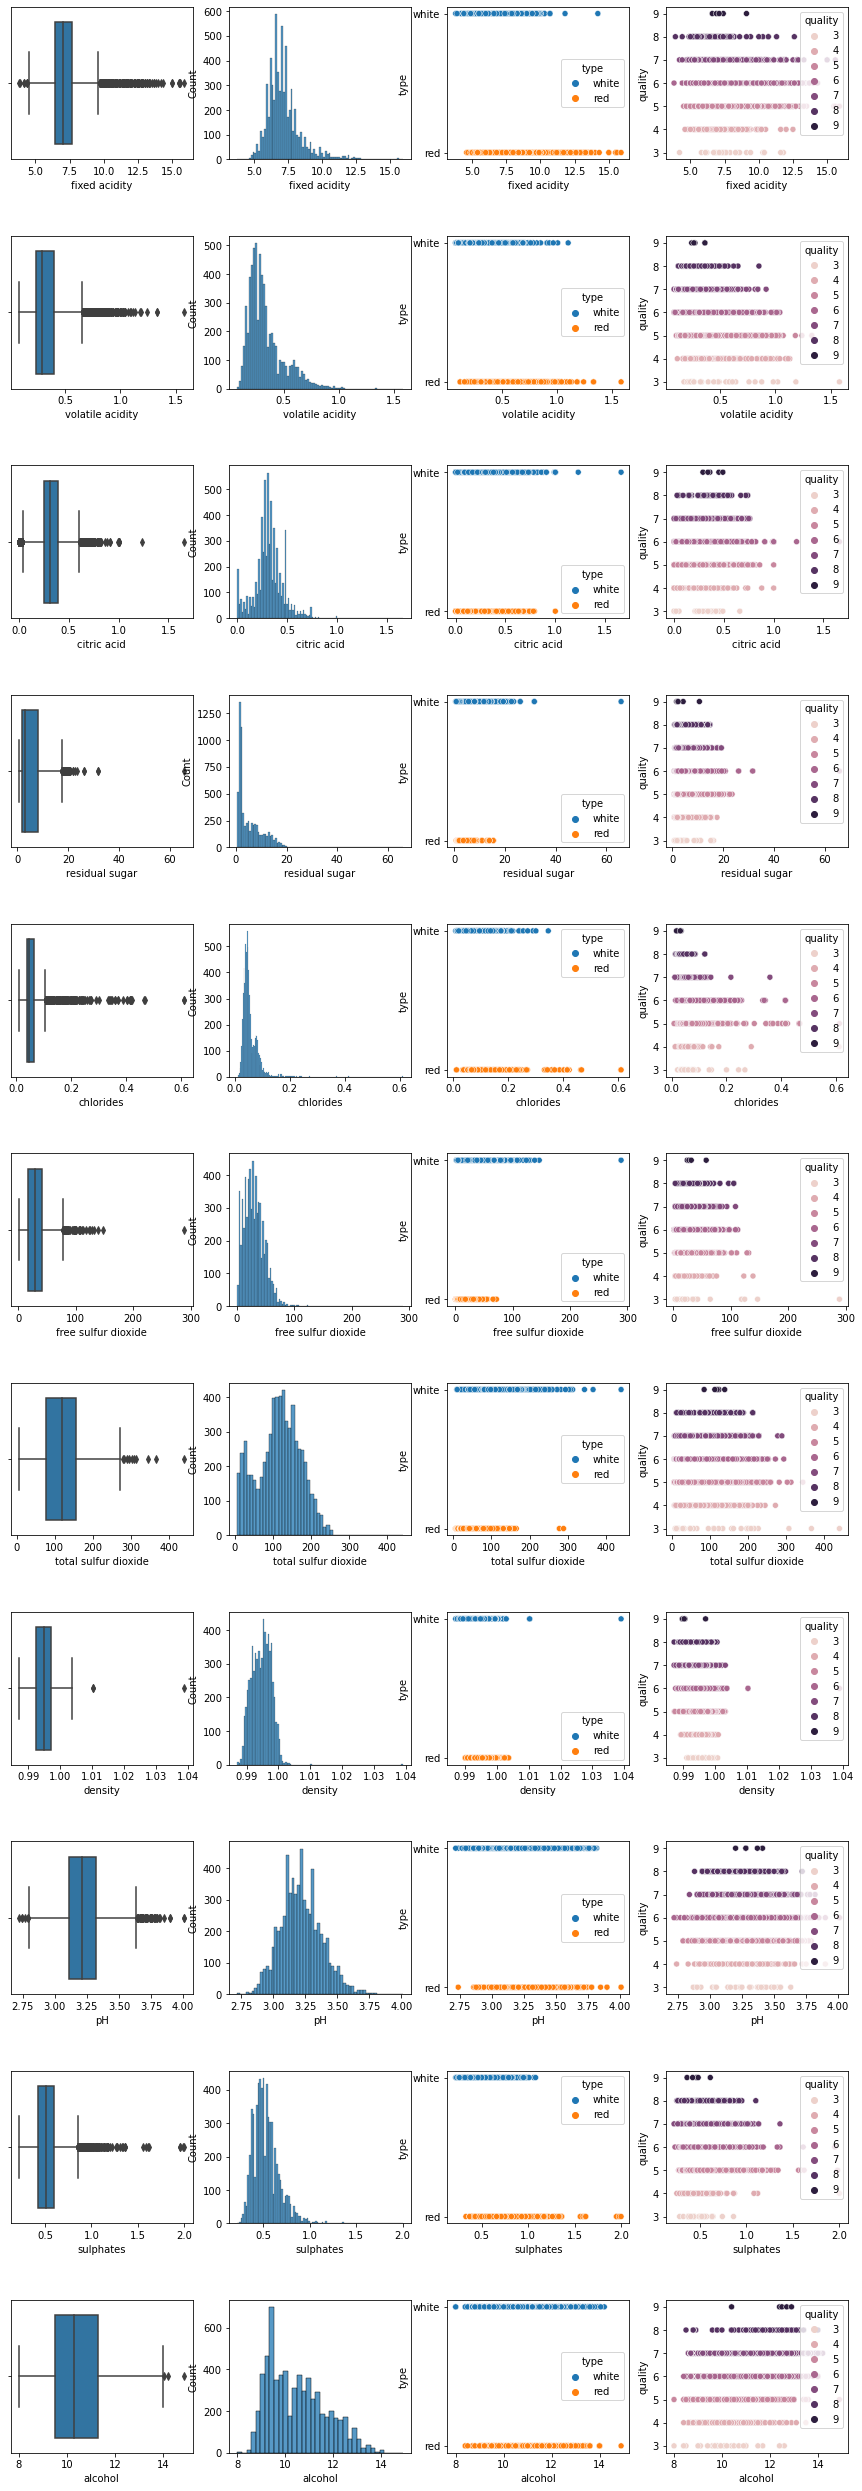

In [17]:
fig, ax = plt.subplots(11, 4, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)

for i in range(11):
    # AX 1
    sns.boxplot(x=columns[i], data=df_join_features_target, ax=ax[i, 0])
    # AX 2
    sns.histplot(x=columns[i], data=df_join_features_target, ax=ax[i, 1])
    # Ax 3
    sns.scatterplot(x=columns[i], y='type', data=df_join_features_target, hue='type', ax=ax[i, 2])
    # Ax 4
    sns.scatterplot(x=columns[i], y='quality', data=df_join_features_target, hue='quality', ax=ax[i, 3])

**Boxplots** are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

**Scatter plots** are used to observe relationships between variables.

Analysis of **histograms**:
- for **fixed acidity** we have a positively skewed, positive direction
- for **volatile acidity** we have a positively skewed, positive direction
- for **chlorides** we have a positively skewed, positive direction
- for **free sulfur dioxide** we have a positively skewed, positive direction
- for **density** we have a positively skewed, positive direction
- for **sulphates** we have a positively skewed, positive direction

Analysis of **scatterplot** for variable Type:

Generally we have a similar distribution of samples for both types, red and white

**Pairwise relationships between continuous variables** correlation

Check correlation between independent variables

Correlation coefficients whose magnitude are between **0.9 and 1.0** indicate variables which can be considered **very highly correlated.**

From below heatmap we can interpret that many attributes are showing linear correlation with each other, for example:
- total sulfur dioxide and free sulfur dioxide

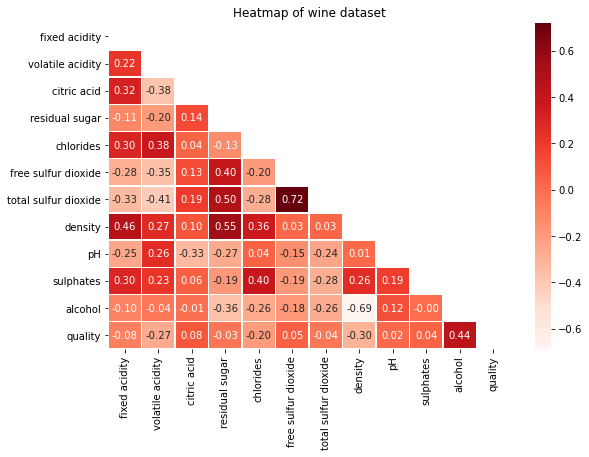

In [150]:
corr = df_join_features_target.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Reds', mask=np.triu(corr))
plt.title('Heatmap of wine dataset')
plt.show()

With seaborn library and having the attribute <code>quality</code> as group

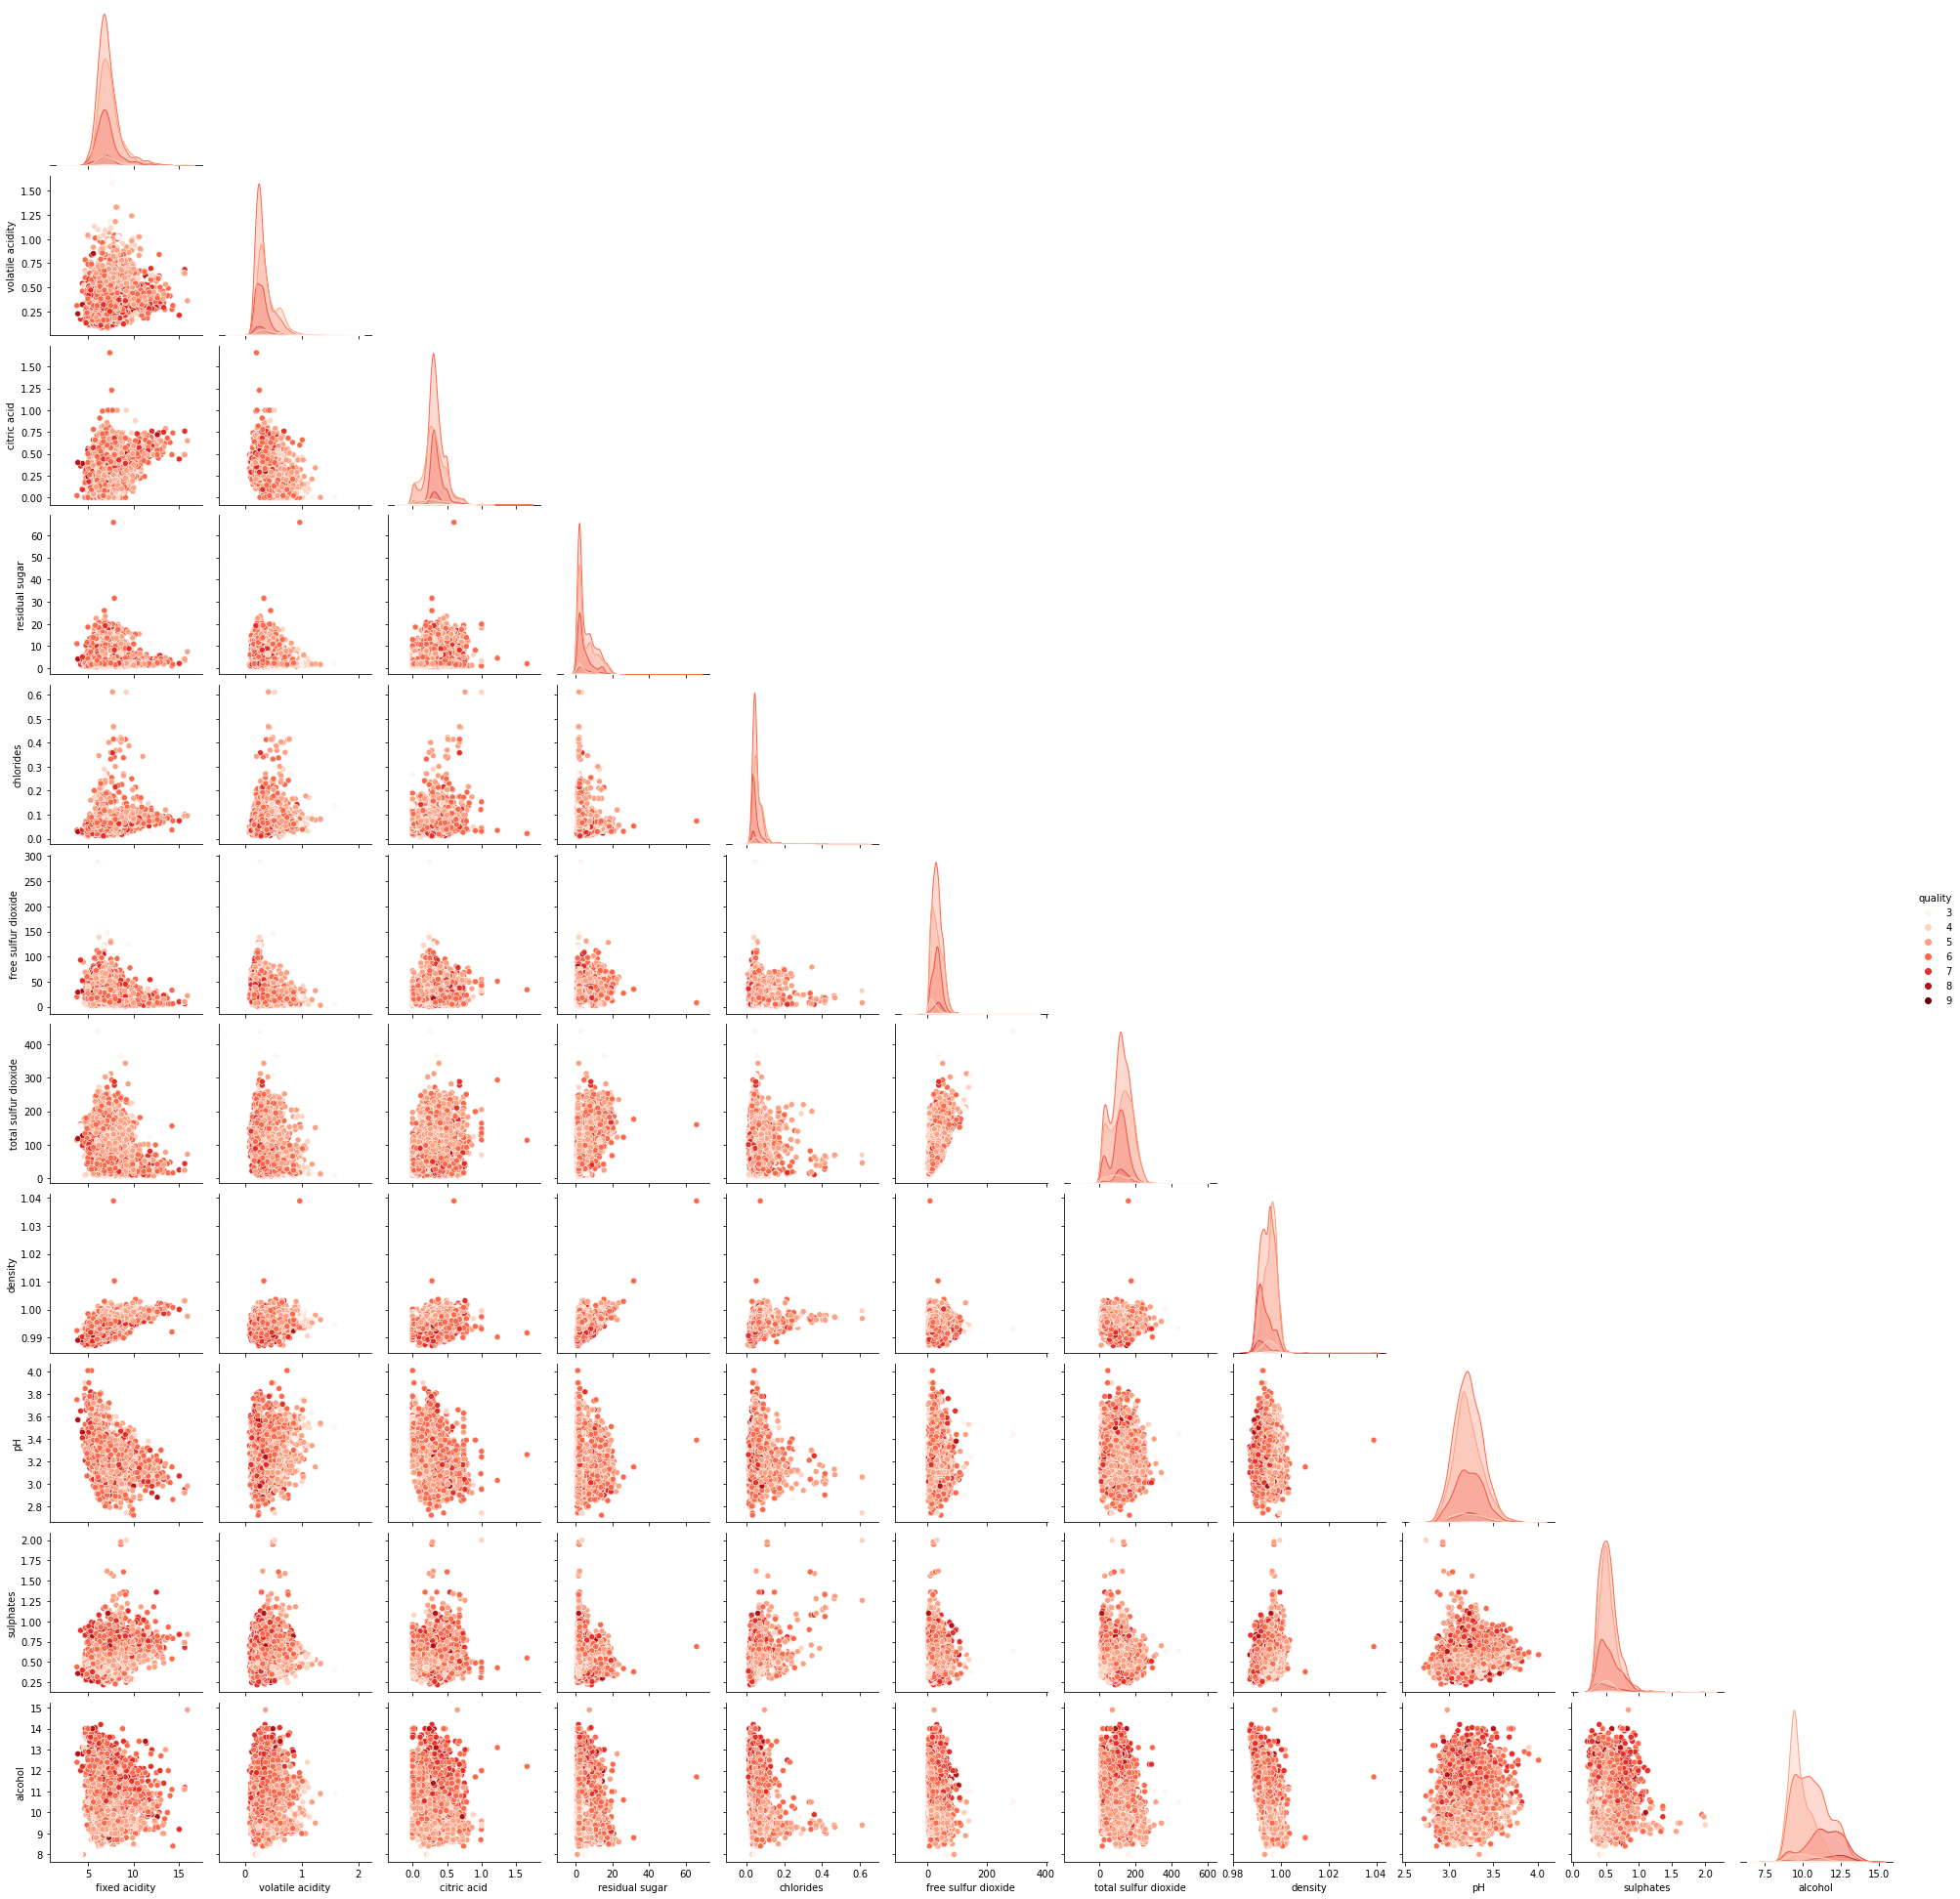

In [149]:
sns.pairplot(df_join_features_target, hue='quality', corner = True, palette='Reds')

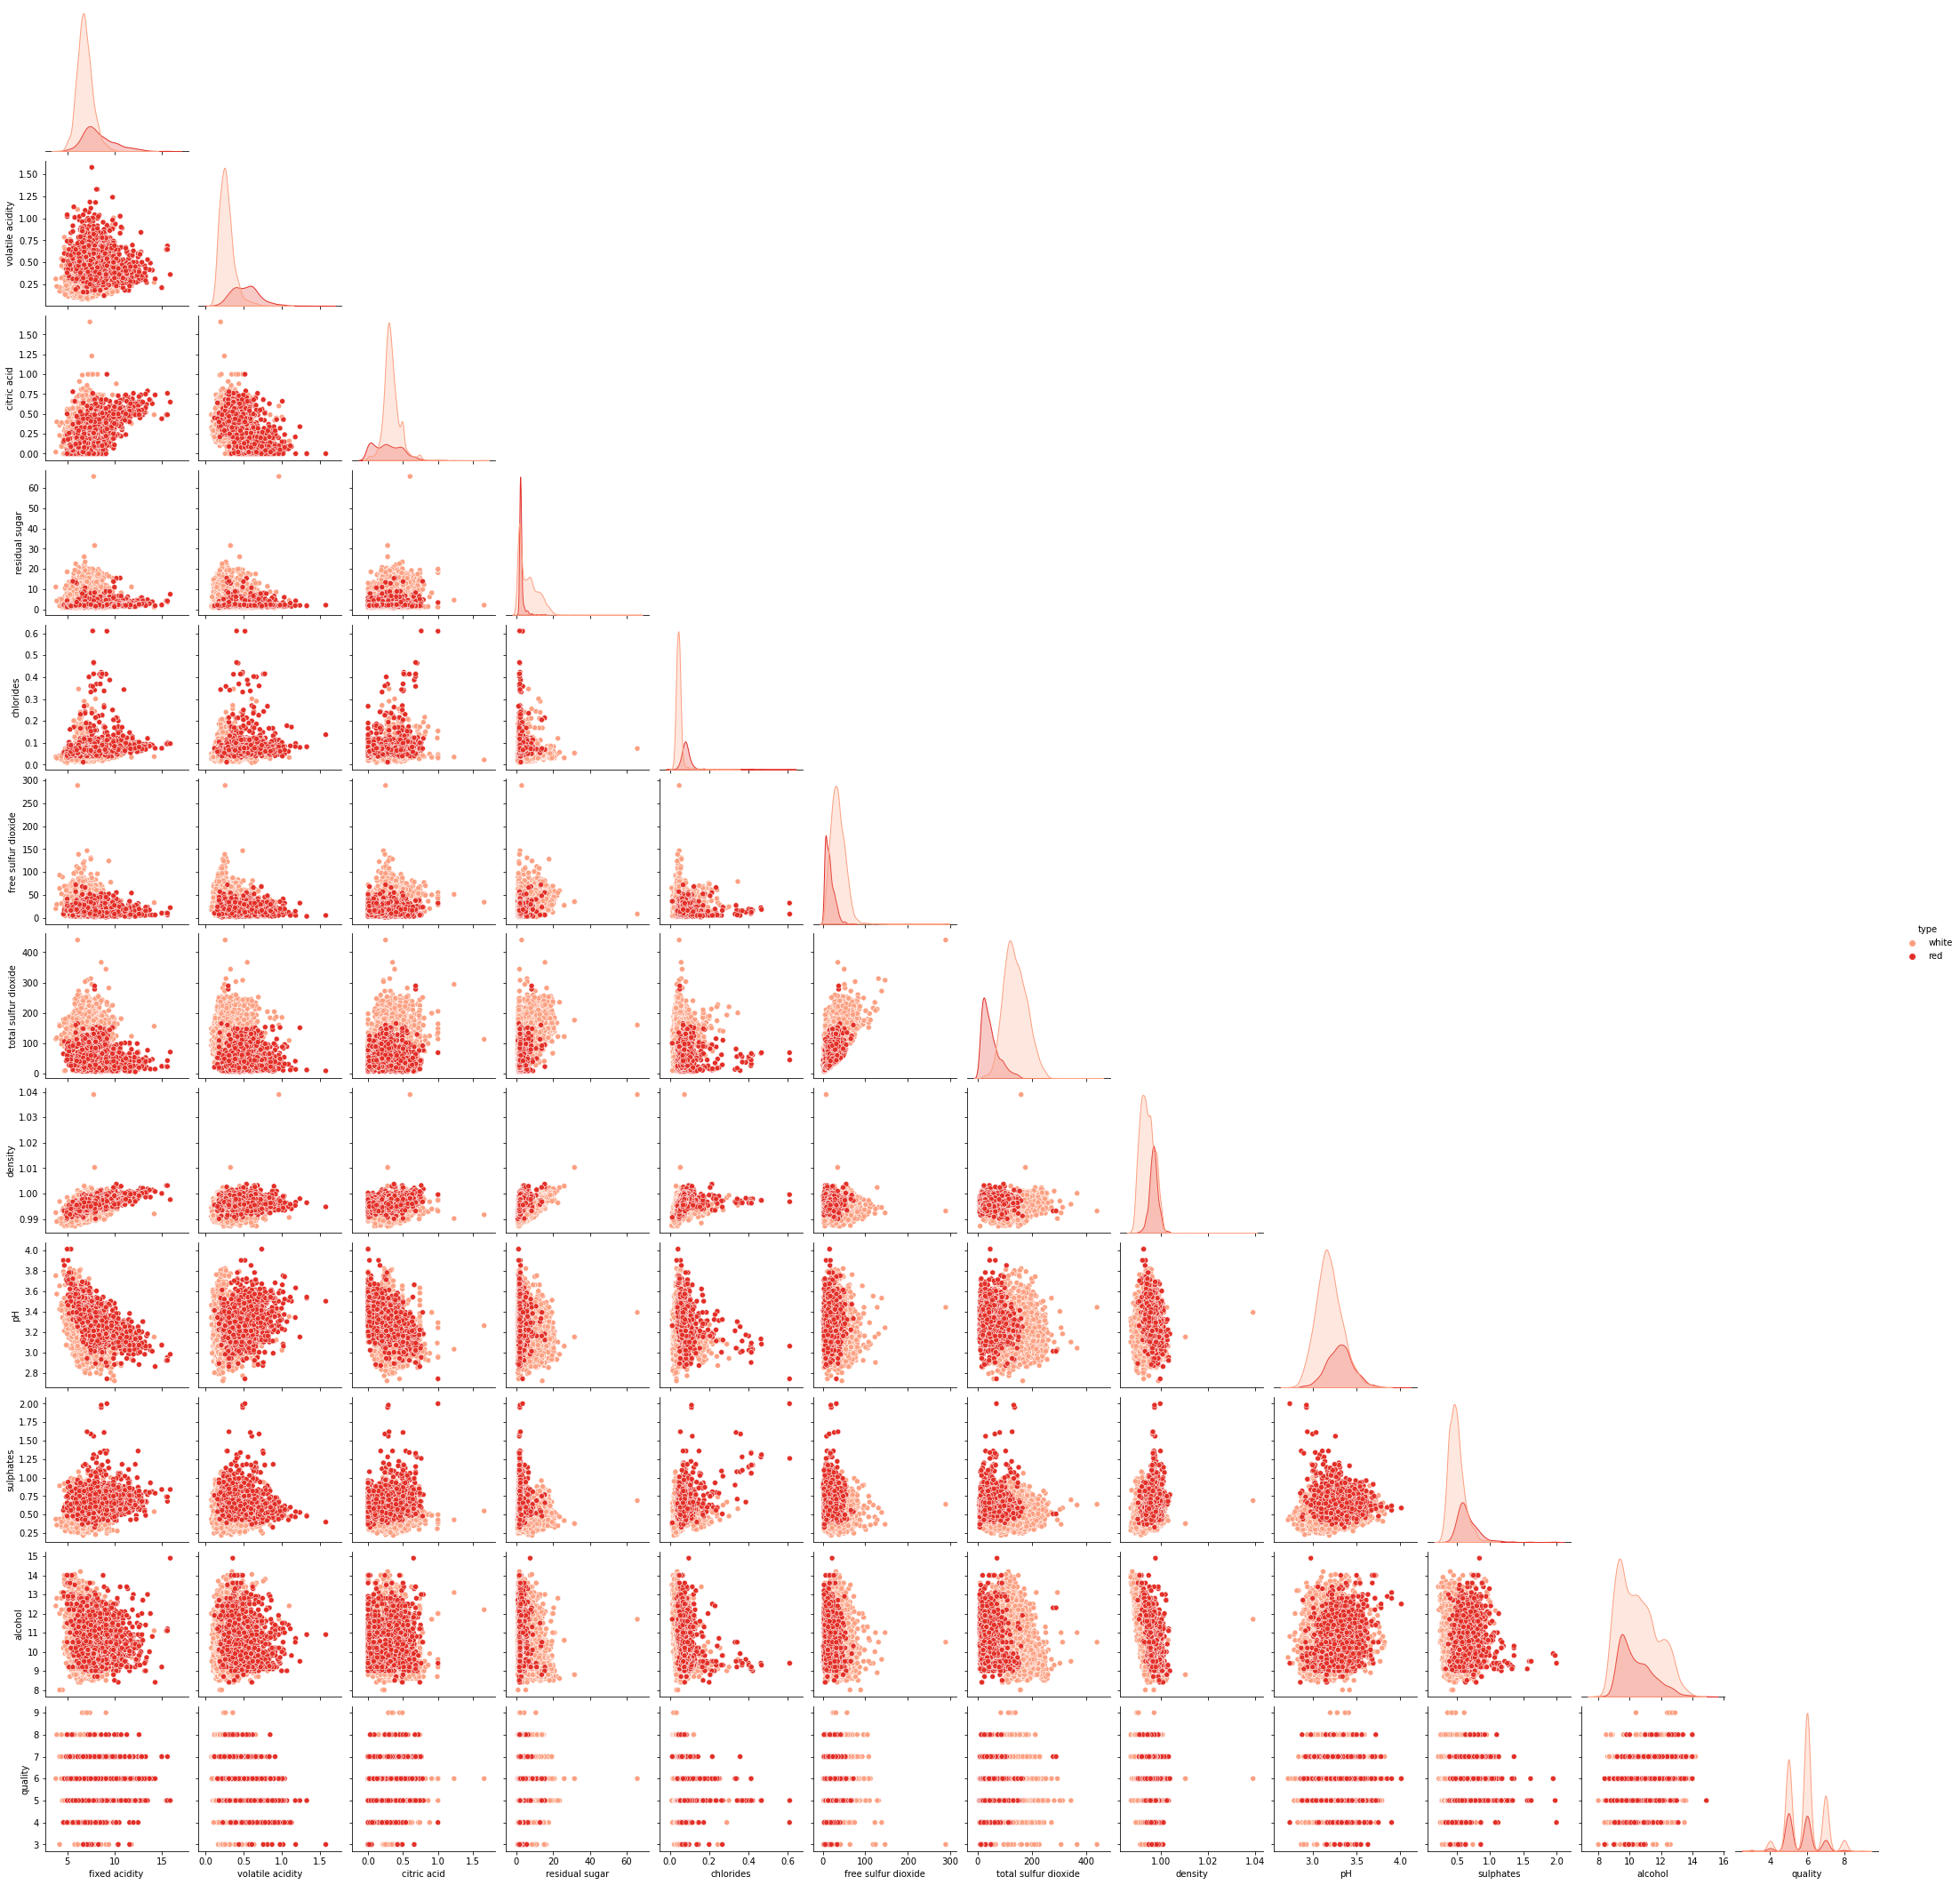

In [148]:
sns.pairplot(df_join_features_target, hue='type', corner = True, palette='Reds')

### 3.2-Plot analysis (correlation)<a id="section_4_2"></a>


Best Correlations are between :

density & residual sugar ---> 0.55

total_sulfor_dioxide & free_sulfor_dioxide ---> 0.72

### 3.3-Feature Engineering and Feature Selection<a id="section_4_3"></a>


**Feature engineering** is the process of transforming variables or features in a dataset to create a predictive model using machine learning.

**Feature selection** is the process of automatically or manually selecting features that significantly contribute to your prediction variable or output.

It is very important to realize that there are a multitude of types of models and that each has its own sensitivities and needs. Such as:

- certain models are unable to handle attributes that measure the same quantity, resulting in multicollinearity or correlation between attributes.
- some models cannot use samples with any missing values.
- the inclusion of irrelevant attributes in data can significantly compromise some models.

Feature engineering and variable selection can help mitigate many of these issues. 

**Feature Selection**
**Classes of Feature Selection Methodologies**

Feature selection methodologies fall into three general classes:

- Intrinsic (or implicit) methods.
- Filter Methods.
- Wrapper methods.



**Target Categorization**

data quality and type

In [21]:
red_T = df_join_features_target.loc[df_join_features_target['type'] == 'red'] #red wine
nr_red = df_join_features_target[df_join_features_target.type == 'red'].shape[0]
len(df_no_missing[df_join_features_target['type'] == 'red'])

white_T = df_join_features_target.loc[df_join_features_target['type'] == 'white'] #white wine
nr_white = df_join_features_target[df_join_features_target.type == 'white'].shape[0]

good_Q = df_join_features_target.loc[df_join_features_target['quality'] >= 7]
good_quality = df_join_features_target[df_join_features_target.quality >= 7].shape[0]

bad_Q=df_join_features_target.loc[df_join_features_target['quality'] < 7]
bad_quality = df_join_features_target[df_join_features_target.quality < 7].shape[0]

print(f'nr_red is {nr_red},\n nr_white is {nr_white},\n good_quality is {good_quality},\n bad_quality is {bad_quality}' )

nr_red is 1593,
 nr_white is 4870,
 good_quality is 1271,
 bad_quality is 5192


Having in consideration the minority class of good quality, the data set is **slightly unbalanced**, because has a proportion of 20%.

Validation of number of rows for type of wine and quality of wine

In [22]:
a=nr_red+nr_white
b=good_quality+bad_quality
a, b
# df_no_missing


(6463, 6463)

Create a new dataframe to have the original dataframe with no missing values

In [23]:
wine = df_join_features_target.copy()

#rows for wine with good quality
# df_join_features_target.loc[df_no_missing['quality'] >= 7]


**rename attribute value** of <code>type</code> .

red = 0

white = 1

In [24]:

# df_wine['type'] = df_no_missing ['type'].map({'red':0, 'white':1})

wine['type'] = wine['type'].replace(['red'], '0')
wine['type'] = wine['type'].replace(['white'], '1')

wine_nr_red = wine[wine.type == '0'].shape[0]
wine_nr_white = wine[wine.type == '1'].shape[0]

#validate nr of rows to type
print(wine_nr_red, wine_nr_white, wine_nr_red + wine_nr_white)

1593 4870 6463


**qualify** the wine as good or bad with attribute <code>quality</code>:

score of 7 or higher- ‘good quality’  

a score of less than 7-  ‘bad quality’


In [25]:
wine['quality']=[1 if x >=7 else 0 for x in wine['quality']] # list comprehension

wine.loc[wine['quality'] == 1] #good_quality
wine.loc[wine['quality'] == 0] #bad_quality

wine_bad_quality = wine[wine.quality == 0].shape[0]
wine_good_quality = wine[wine.quality == 1].shape[0]

#validation nr of rows to quality
print(wine_good_quality, wine_bad_quality, wine_good_quality+wine_bad_quality)

1271 5192 6463


**Rename columns to better recall them**.

In [26]:
# Rename columns to better recall them.
wine.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)
wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol type  quality  
0      8.8    1        0  
1      9.5    1        0  
2     10.1    1        0  
3      9.9    1        0  
4      9.9    1        0

**convert attributs of dataframe to string**
**combine two columns of text** in pandas dataframe

In [27]:
wine.shape # 6463 rows, large dataset
# wine.info()

#convert multiple dataframe columns to string
wine[['type', 'quality']]= wine[['type', 'quality']].astype(str)

#check type
# wine.info()

#combine attributes in another new attribut
wine['type_quality'] = wine['type']+wine['quality']
wine.head()

#  if < 150rows small data sets
# [''.join(i) for i in zip(wine["type"].map(str),wine["quality"])]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol type quality type_quality  
0      8.8    1       0           10  
1      9.5    1       0           10  
2     10.1    1       0           10  
3      9.9    1       0           10  
4      9.9    1       0           10

**distinct values of type_quality**

In [28]:
#set has no duplicate values
set_wine_type_quality = set(wine['type_quality'])

print('The unique elements of the input type_quality are:\n')

for i in set_wine_type_quality:
    if i == '00':
        print(i, 'red wine - bad quality')
    elif i == '01':
        print(i, 'red wine - good quality')
    elif i == '10':
        print(i, 'white wine - bad quality')
    elif i == '11':
        print(i, 'white wine - good quality')
    else:
        print(i, 'zzz')

set_wine_type_quality       

The unique elements of the input type_quality are:

00 red wine - bad quality
10 white wine - bad quality
11 white wine - good quality
01 red wine - good quality


{'00', '01', '10', '11'}

**Target categorizing**

type and quality together

Create a data frame with type, , quality and type_quality  to have the **target_data_frame**

In [29]:
wineQ = pd.DataFrame(wine, columns=['type','quality', 'type_quality'])
type(wineQ)
# (wineQ.loc[wineQ['quality']=='0']).shape #bad quality
# wineQ.loc[wineQ['quality']=='1'] # good quality
# wineQ.loc[wineQ['type']=='0'] #red type
# wineQ.loc[wineQ['type']=='1'] # white type

print((wineQ.loc[wineQ['type_quality']=='00']).shape) #red good quality
print((wineQ.loc[wineQ['type_quality']=='01']).shape) #red bad quality
print((wineQ.loc[wineQ['type_quality']=='10']).shape) #white good quality
print((wineQ.loc[wineQ['type_quality']=='11']).shape) #white bad quality
type(wineQ), wineQ.info()

(1376, 3)
(217, 3)
(3816, 3)
(1054, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6463 non-null   object
 1   quality       6463 non-null   object
 2   type_quality  6463 non-null   object
dtypes: object(3)
memory usage: 151.6+ KB


(pandas.core.frame.DataFrame, None)

The proportion of samples for each class is :
- 21%
- 3%
- 59%
- 16%

the **data-set is unbalanced**egarding the feature type quality. so to carry out a classification task we should apply certain sampling tecnique as for example:
- Re-sampling the dataset 
    - under-sampling (add copies of instances from the minority class).
    - Over-sampling (delete instances from the majority class).
- Random under-sampling (randomly eliminate instances from the majority class of a dataset and assign it to the minority class)
- Random over-sampling 
- Try generating synthetic samples, using algorithms such as SMOTE (Synthetic Minority Over-sampling Technique)

Other tecniques
- K-fold Cross-Validation in the Right Way (cross-validation should always be done before over-sampling the data to avoid overffiting)
- Ensemble different re-sampled datasets
- Resample with different ratios
- Cluster the abundant class

**find the unique values in dataframe by column** <code>wineQ</code>.

In [30]:
#unique values of df wineQ
for col in list(wineQ):
    print(col)
    print(np.sort(wineQ[col].unique()))
    print('\n')
          

type
['0' '1']


quality
['0' '1']


type_quality
['00' '01' '10' '11']




**sumary of target and features dataframe**

In [31]:
wineQ.head(), wine.head()

(  type quality type_quality
 0    1       0           10
 1    1       0           10
 2    1       0           10
 3    1       0           10
 4    1       0           10,
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0

  ### 3.3.1-Visualization and plots<a id="section_4_3_1"></a>
  

**Visualizing Numeric Features**
The first step to start the exploratory data process when the purpose is to predict the output, is to create visualizations that gives knowlegde of the output and to determine relations between the attributes and the result.
Knowledge aboyt the output can be extract by creating a histogram or box plot.

Analysing the characteristics between attributes allows to determine their importance.

- individual attribute scatter plots with the output labels,
- an Attributes pairwise correlation diagram,
- a lower dimensions region into which high-dimensional attributes are projected,
- For time-based attributes, use line plots.
- A regression or classification tree's initial levels,
- For investigating relationships between categorical variables, Mosaic plots or heatmaps across the samples and attributes are used.

In this notebook is used for Univariate visualizations:

- Box Plots
- Violin Plots
- Histograms

#### Box plot <a id="section_3_1_1"></a>

As the main goal of modeling is to unsderstand variation in attribute, the first step should be to understand the distribuition of the attribute. 
For the Free sulfur diaoxide attribute, it is important to understand if the distribution is skewed, this means that the distribution has a decreasing frequency of a larger observations, if the distributions appears to be made up of two or more individual distributions, or if exist outliers.

**Box plots** are a method that demonstrates graphical locality, spread and skewness of groups of numerical data through their quartiles. Additionally there can be added lines, called whiskers, that indicates variability outside the upper and lower quartiles.
Plotting outliers as separate points outside the box-plot's whiskers is one way to display data that deviates dramatically from the rest of the dataset.

*Median*- The line that splits the box in half indicates the median, also known as the middle quartile, which represents the midpoint of the data. Half of the scores are higher than or equal to this amount, while the other half are lower.

*Inter-quartile range(IQR)* The middle 50% of the group's scores are represented by the middle "box." The inter-quartile range is the range of scores between the lower and upper quartiles. The interquartile range encompasses the middle 50% of score values.

*Upper quartile* 75% of the scores fall below the upper quartile.

*Lower quartile* 25% of scores fall below the lower quartile.

*Whiskers* The upper and lower whiskers represent scores outside the middle 50%.

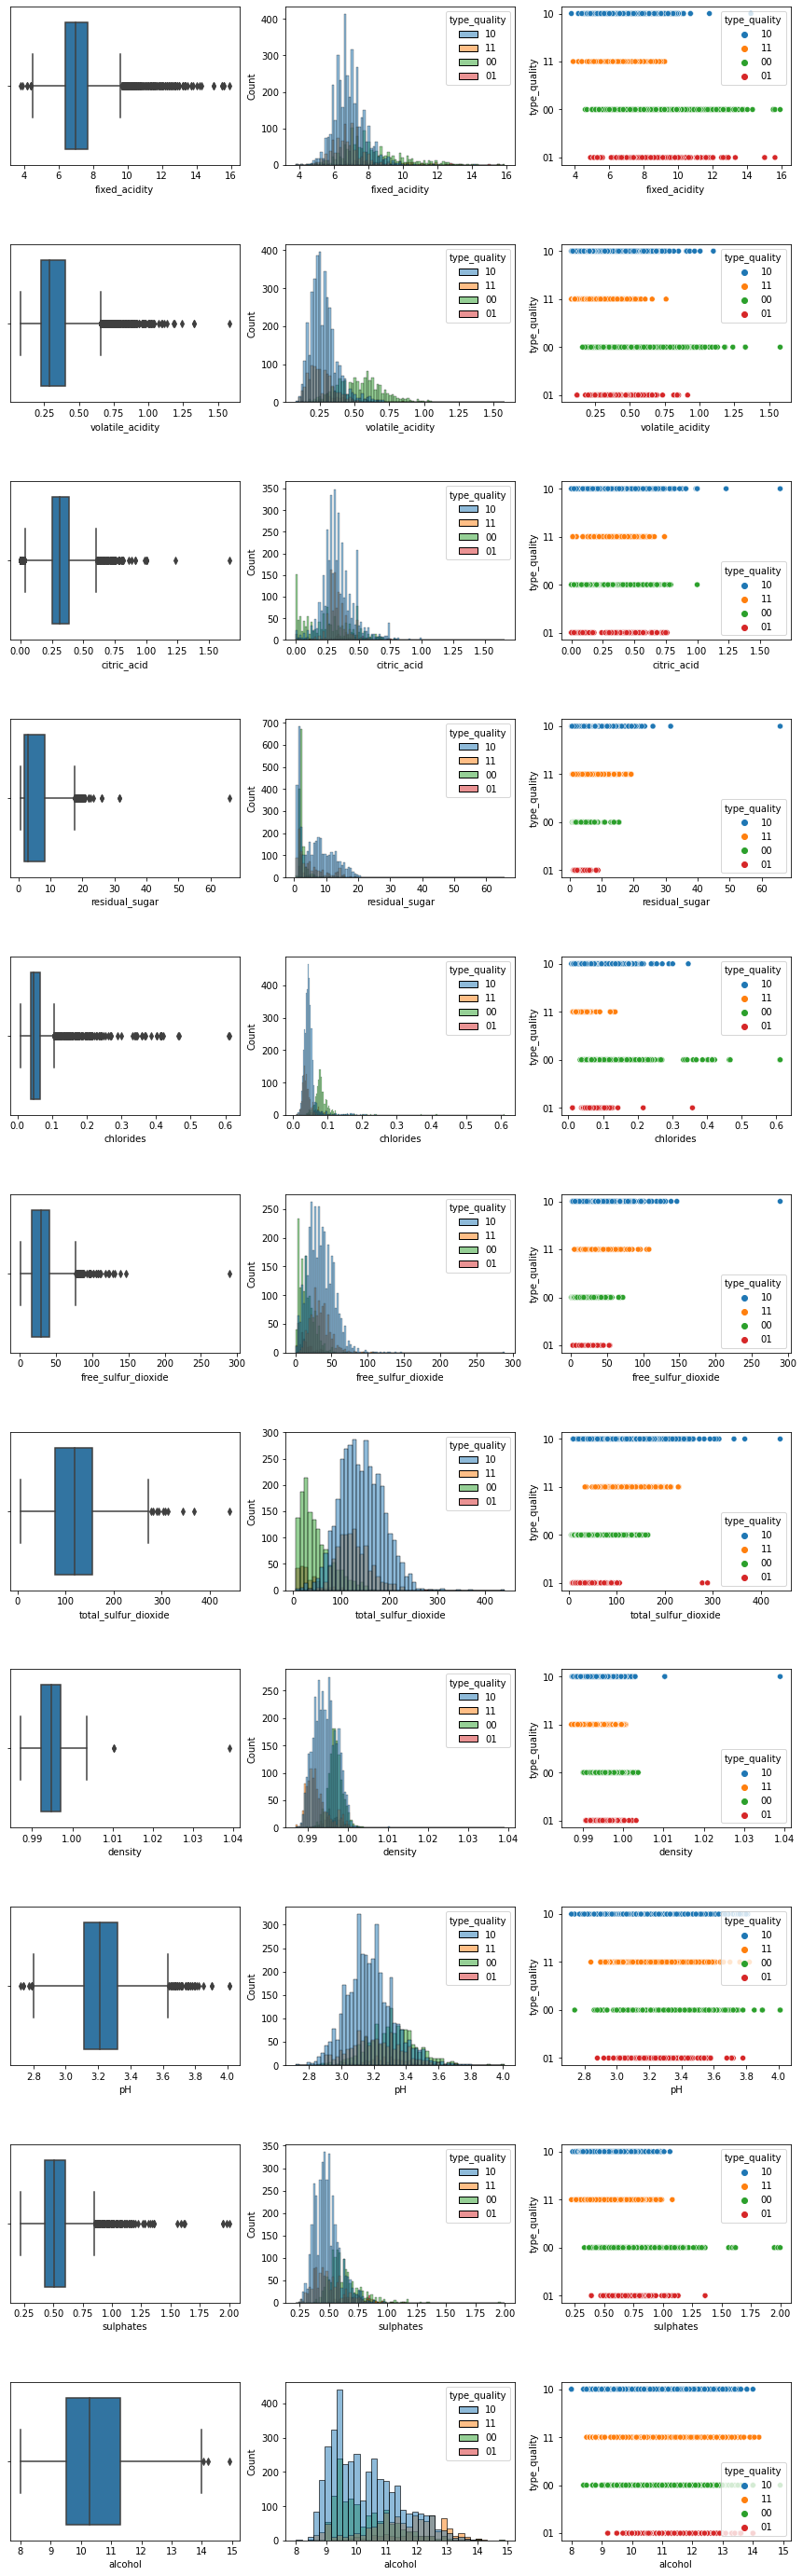

In [32]:
columns = list(wine.columns)

len(columns),columns 

fig, ax = plt.subplots(11, 3, figsize=(15, 50))
plt.subplots_adjust(hspace = 0.5)

for i in range(11):
#     print(columns[i])
    # AX 1
    sns.boxplot(x=columns[i], data=wine, ax=ax[i, 0])
    # AX 2
    sns.histplot(x=columns[i], data=wine, hue='type_quality', ax=ax[i, 1])
    # Ax 3
    sns.scatterplot(x=columns[i], y='type_quality', data=wine, hue='type_quality', ax=ax[i, 2])


If we try to interpret above box plot it has lots of outliers all values greater thar 77 are considered as outlier. In terms of skewness if we try to analyze it is right skewed or positive skewed means density of data is more near the origin.

Above Box plot again has lots of outliers as lots of values are greater than (Q3 + 1.5IQR) and some vales are less than (Q1 - 1.5IQR).

With the box plot it isn't effective at identifying distributions that have multiple peaks or modes. 
the histogram offer the ability to see the distribution characteristics and also is possible to see more than one peak.
In violin plot is created by generating a density or distribution of the data and its mirror image. As it is possible to see in the last plot, it is identifying many peaks in citric acid distribution.
It is also possible to add lower quartile, median, and upper quartile in violin plot to also consider this information.

A **histrogram** is a representation that organizes a group of data poins into user-specified specified ranges.  Is similar to a bar graph, takes the data poins and group them into logical ranges or bins

### 3.3.2-Engineering numeric attributes<a id="section_4_3_2"></a>


Models such as **trees** that build associations between the attributes and the output based on the rank of the attribute values rather than the actual value are resistant to skewed attribute distributions and anomalous values in specific samples. 

**Support vector machines and K-nearest neighbours** are two more models that are far more sensitive to features with skewed distributions or outliers. 

Another common situation that causes issues for certain models but not others is continuous qualities that have a high correlation with one another.

Continuous attributes may cause issues throughout the modelling process. such as:
- Have radically disparate scales.
- Only include a few extreme values.
- Be restricted to either the high or low end of the spectrum.
- Have a complicated relationship with the outcome and be really predictive, yet they are too complex to be effectively captured by complex models or expressed as a simple function.
- have both excessively redundant and important information.
- Adhere to a skewed distribution, meaning that a small percentage of samples have values that are orders of magnitude greater than the bulk of the data (skewness).
- have both excessively redundant and important information. That means, the linkages between the new attributes and the output could still be preserved or improved, but the information gathered could be more effectively and efficiently represented with a smaller, consolidated number of new attributes.

The tecniques to work this is transformations of data:
-change the scale of the data


**change scale of data**

**logit transformation**

When transforming a single variable, like a proportion, it is crucial to consider the case of variables whose values are restricted to a range of zero to one.

For data between zero and one, the logit transformation could be used. If p is the variable, the logit transformations is:
logit(p)=ln(p/1-p)

This transformation changes the scale from values between zero and one to values between negative and positive infinity.
Once model predictions are created, the inverse logit transformation can be used to place the values back on their original scale. 

**centring**

Centering a predictor is a common technique. The predictor’s training set average is subtracted from the predictor’s individual values. 

Scaling is the process of dividing a variable by the corresponding training set’s standard deviation. This ensures that that variables have a standard deviation of one.

As an alternative, range scaling converts the data into an arbitrary range (often between zero and one) using the training set's minimum and maximum values.

It is necessary to have in mind that the statistics required for the transformation (e.g., the mean) are estimated from the training set and are applied to all data sets (e.g., the test set or new samples). 
when the distance or dot products between predictors are used (such as K-nearest neighbors or support vector machines) a standardization procedure is essential.

Below we extract the information of linear correlated attributes from the data.

In [35]:
# return an array of columns names
wine.columns.values
wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol type quality type_quality  
0      8.8    1       0           10  
1      9.5    1       0           10  
2     10.1    1       0           10  
3      9.9    1       0           10  
4      9.9    1       0           10

Validation of unique values in target_categorizing

In [65]:

uniqueValues=wine['type_quality'].unique()
isValid=np.array_equal(
      np.sort(uniqueValues),
      np.array(['00', '01', '10', '11'])
)

#print(uniqueValues, isValid)

if not isValid:
    print(f"type_quality data is corrupted: {uniqueValues}")
else:
    print("type_quality OK")

type_quality OK


## 3.4-Target categorizing<a id="section_4_4"></a>

**Lets predict the attribute 'type_quality'.**

**splitting our data in target and features**

In [66]:
# Create features
features = wine.drop(['type', 'quality', 'type_quality'],axis=1).values
#print(features)

# Create labels
labels = wine['type_quality'].values
#print(labels)

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.20, 
                                                                            random_state =10)

train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((5170, 11), (1293, 11), (5170,), (1293,))

## 3.5-Normalization<a id="section_4_5"></a>

Normalize X data to decrease effect of larg number.

Here, Using MinMaxScaler and ranged in [0, 1]

In [69]:
features, labels

(array([[ 7.   ,  0.27 ,  0.36 , ...,  3.   ,  0.45 ,  8.8  ],
        [ 6.3  ,  0.3  ,  0.34 , ...,  3.3  ,  0.49 ,  9.5  ],
        [ 8.1  ,  0.28 ,  0.4  , ...,  3.26 ,  0.44 , 10.1  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 array(['10', '10', '10', ..., '00', '00', '00'], dtype=object))

In [76]:
# Create X from DataFrame and y as Target
X_temp = wine.drop(['type', 'quality', 'type_quality'],axis=1)
Y = wine['type_quality']
type(X_temp), type(Y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [152]:
#Using MinMaxScaler and ranged in [0, 1]
scaler_min_max = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)

X = pd.DataFrame(scaler_min_max, columns=X_temp.columns)

#check if values between [0,1]
X.describe().T.style.background_gradient(axis=0, cmap='Reds')


# 4-Modeling<a id="chapter5"></a>

Number of records for each value of target

In [81]:
Y.value_counts()

10    3816
00    1376
11    1054
01     217
Name: type_quality, dtype: int64

split data frame into train, test

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=30)
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 2418       0.314050          0.136667     0.192771        0.214724   0.089701   
 3599       0.322314          0.160000     0.367470        0.171779   0.053156   
 5215       0.264463          0.403333     0.000000        0.019939   0.096346   
 1322       0.264463          0.253333     0.234940        0.085890   0.049834   
 5008       0.330579          0.320000     0.114458        0.023006   0.119601   
 
       free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
 2418             0.107639              0.449309  0.209948  0.217054   
 3599             0.225694              0.419355  0.208791  0.217054   
 5215             0.135417              0.131336  0.208020  0.682171   
 1322             0.156250              0.361751  0.109697  0.379845   
 5008             0.048611              0.228111  0.175246  0.472868   
 
       sulphates   alcohol  
 2418   0.129213  0.173913  
 3599   0.1797

Define a function to **ploting Confusion matrix**

In [153]:

def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Reds")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['00', '10', '11', '01'])
    ax.yaxis.set_ticklabels(['00', '10', '11', '01']) 
    plt.show()


Define a function to **ploting Classification Report**

In [154]:
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Reds', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()
    
# return 
# macro average (averaging the unweighted mean per label), 
# weighted average (averaging the support-weighted mean per label), 
# sample average (only for multilabel classification). 

# Micro average (averaging the total true positives, false negatives and false positives) is only shown 
# for multi-label or multi-class with a subset of classes

Function to plot Confusion Matrix and Classification report

In [155]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Reds", ax=ax[0]) #Purples
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['00', '10', '11', '01'])
    ax[0].yaxis.set_ticklabels(['00', '10', '11', '01'])
    
    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Reds', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

## 4.1-RandomForestClassifier<a id="section_5_1"></a>

**Random forest classifier**

RFC can be used to solve for regression or classification problems. The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample.



As **data set is unbalanced** for the target class, we will use the K-fold Cross-Validation with 20-fold cross validation, cv=20

In [92]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [20, 100, 300],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1) #n_jobs=-1 all processors
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train) #Grid Search Cross-Validation

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\anaconda3\lib\site-packages\sklearn\uti

Tuned hyper parameters :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}
accuracy :  0.8817875726966635


In [94]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
rf

RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [95]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score) #mean accuracy on the given test data and labels.

RandomForestClassifier score :  0.881


In [96]:
y_test.value_counts()

10    938
00    350
11    274
01     54
Name: type_quality, dtype: int64

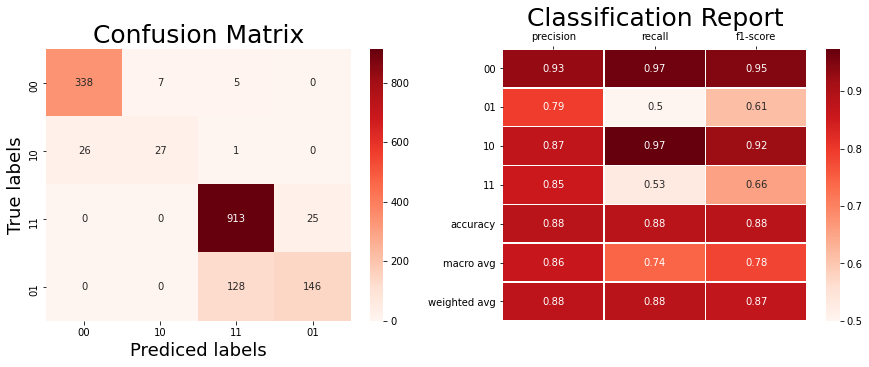

In [156]:
clf_plot(y_pred_rf)

## 4.2-Logistic regression<a id="section_5_2"></a>

Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have both models, we can compare them on a few performance metrics, such as false positive and false negative rate (or how many points are inaccurately classified).

As **data set is unbalanced** for the target class, we will use the K-fold Cross-Validation with 10-fold cross validation, cv=10

**Regularization** is a set of methods for reducing overfitting in machine learning models


In [99]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'], # because we have imbalanced data
    'solver' : ['liblinear', 'newton-cg', 'sag', 'saga'] #regularization liblinear (l1, l2), newton cg and sag(l2, none), saga (‘elasticnet’, ‘l1’, ‘l2’, None)
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_

Tuned hyper parameters :  {'C': 1000, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.7984318820823038


C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [100]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
lr

LogisticRegression(C=1000, class_weight='balanced', solver='liblinear')

In [101]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score) #mean accuracy on the given test data and labels.

LogisticRegression score :  0.802


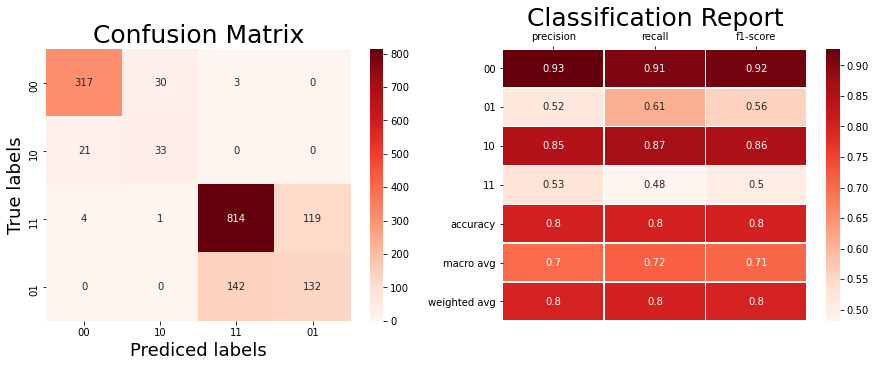

In [157]:
clf_plot(y_pred_lr)

## 4.3-Support Vector Machine<a id="section_5_3"></a>

SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. 

Algorithm used for both classification and regression. 

The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space.

As **data set is unbalanced** for the target class, we will use the K-fold Cross-Validation with 10-fold cross validation, cv=10

In [102]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 100}
accuracy :  0.8407242055039618


In [104]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
svc

SVC(C=10, gamma=100)

In [105]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.837


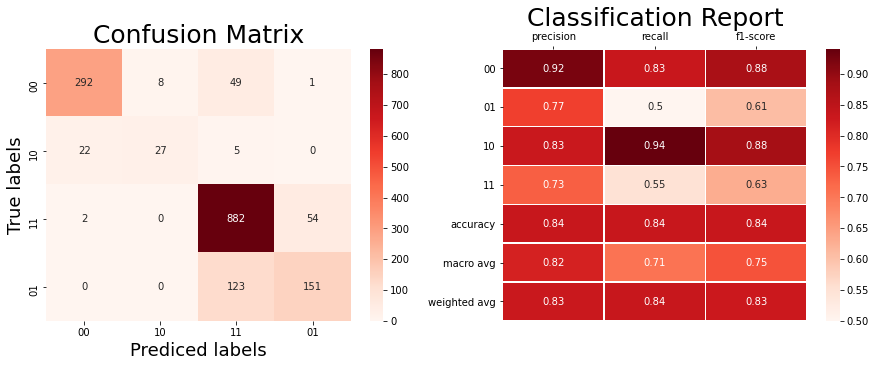

In [158]:
clf_plot(y_pred_svc)

## 4.4-Decision Tree classifier<a id="section_5_4"></a>

A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. 

Is used for both classification and regression problems.

As **data set is unbalanced** for the target class, we will use the K-fold Cross-Validation with 10-fold cross validation, cv=10

In [113]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'], # is used to decide which feature and which threshold is used. best- if taking the feature with the highest importance, random -  if taking the feature randomly but with the same distribution
    'max_depth' : list(np.arange(5, 20, 1))
        }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': 12, 'splitter': 'best'}
accuracy :  0.8254536934480701


In [114]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
tree

DecisionTreeClassifier(max_depth=12)

In [115]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.835


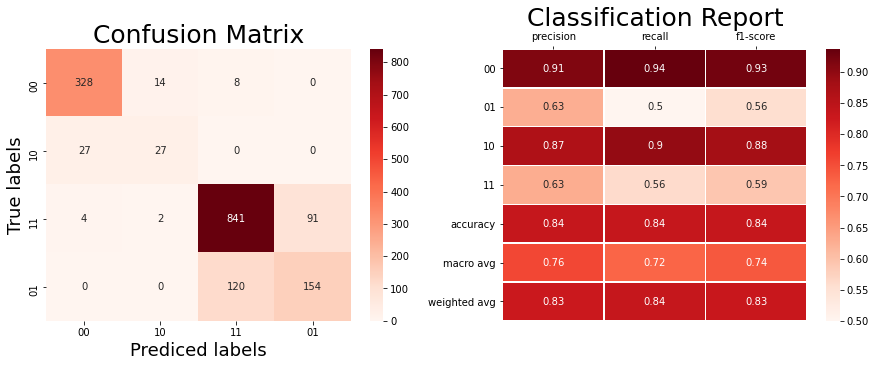

In [159]:
clf_plot(y_pred_tree)

## 4.5-KNeighbors classifier<a id="section_5_5"></a>

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).

As **data set is unbalanced** for the target class, we will use the K-fold Cross-Validation with 10-fold cross validation, cv=10

In [117]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(5, 20, 2)), #nr of neighbors
    'weights': ['uniform', 'distance'], # uniform All points in each neighborhood are weighted equally., distance- weight points by the inverse of their distance. closer neighbors of a query point will have a greater influence than neighbors which are further away. 
    'p' : [1, 2, 3, 4] #type of distance 1- manhattan_distance, 2- euclidean_distance, p, minkowski_distance (l_p) is used
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
accuracy :  0.8693993354349493


In [119]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=19, p=1, weights='distance')

In [120]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.875


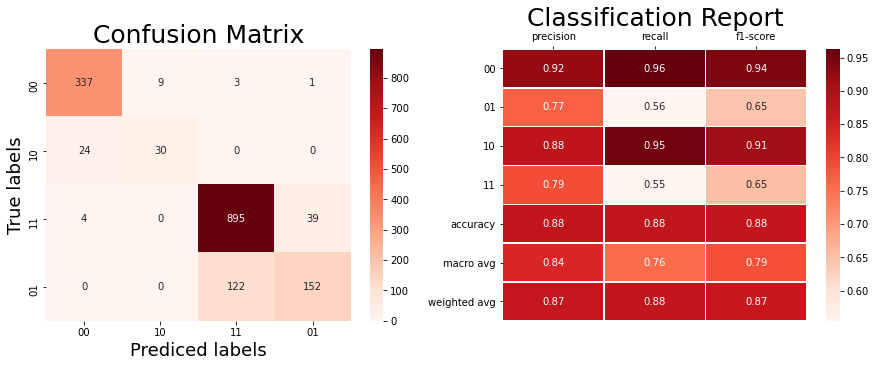

In [160]:
clf_plot(y_pred_knn)

## 4.6-Gaussian Naive Bayes<a id="section_5_6"></a>

Classification technique based on a probablistic approach that assumes each class follows a normal distribution. It assumes each parameter has an independent capacity of predicting the output variable.

In [132]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.746


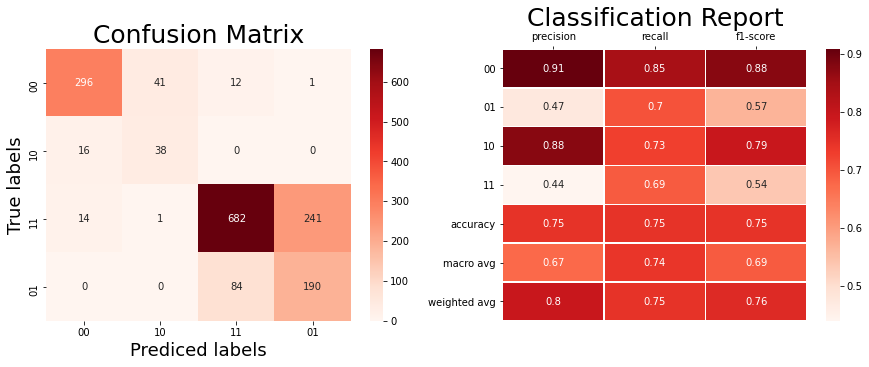

In [161]:
clf_plot(y_pred_gnb)

## 4.7-Summary<a id="section_5_7"></a>

In [162]:
summary = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 
                   'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

summary.sort_values(by='Score', inplace=True)

In [163]:
sns.set_palette("Reds")

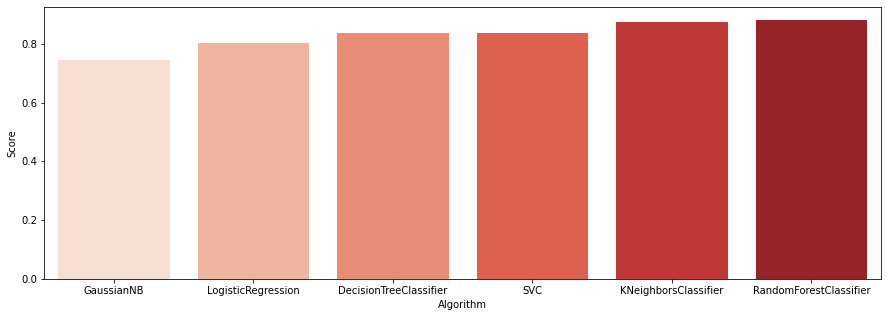

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=summary)
# ax.bar_label(ax.containers[0], fmt='%.3f')
# ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

As presented in plot above, best algorithm base Score is 
Random forest

## 4.8-Final  Modelling<a id="section_5_8"></a>

In [139]:
# Model
rf = RandomForestClassifier(**rf_cv.best_params_)

In [140]:
#train model with all data
rf.fit(X, Y)

RandomForestClassifier(max_features='sqrt', n_estimators=300)